<a href="https://colab.research.google.com/github/francomanca93/fundamentos-practicos-de-machine-learning/blob/main/2.regresi%C3%B3n-lineal-y-logistica/regresi%C3%B3n_logistica_scikitlearn_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística con Scikit-Learn: definición y división de datos

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.shape

(768, 9)

In [8]:
diabetes.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 
                'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

# Regresión logística con Scikit-Learn: evaluación del modelo

Matriz de confusión es una representación gráfica que nos permite ver el grado de acierto de nuestro modelo. El gráfico tiene cuatro divisiones: Verdaderos Positivos (VP), Falsos Positivos (FP), Falsos Negativos (FN) y Verdaderos Negativos (VN). Siendo los datos verdaderos los que nos interesa maximizar (valores de la diagonal).

![matriz_confusion](https://imgur.com/WRi7B8C.png)

Los datos necesarios los obtenemos de nuestro modelo (con ayuda del módulo metrics):

In [17]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Esto nos genera un arreglo de 2 dimensiones, pero esto no es facil de ver, por lo tanto generaremos una grafica para ver los resultados.

Text(0.5, 257.44, 'Etiqueta de predicción')

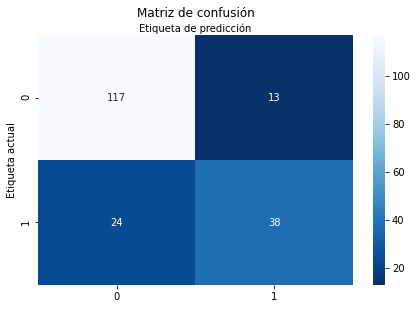

In [19]:
import numpy as np
# Definimos los ejes con sus respectivas etiquetas
# como queremos mostrar nuestra matriz de confusion

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# mostremos nuestra matriz
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

- seaborn nos permite crear un mapa de calor a partir de los valores entregados (la matriz de confusión en este caso), los parámetros que entregamos son: 
  - **annot** → permite colocar los valores sobre el gráfico
  - **cmap** → estilo del gráfico,
  - **fmt** → formato de los valores
- ax.xaxis,set_label_position() → nos permite definir donde colocar la etiqueta del eje x
- plt.tight_layout() → crea un padding en torno al gráfico (lo enmarca)

### Conclusión

- Primer cuadro, 0-0, son los ejemplos que fueron clasificados correctamente.
- Cuarto cuadro, 0-1, son los ejemplos que fueron clasificados correctamente cuando es negativo, es decir cuando clasifica y en la etiqueta nos dice que no tiene diabetes.

- Segundo cuadro, 1-0, son los ejemplos que fueron clasificados incorrectamente como negativo, es decir, no deberia haber tenido esa etiqueta NO TIENE DIABETES.
- Tercer cuadro, 1-1, son los ejemplos que fueron clasificados incorrectamente.

In [21]:
print('Exactitud: ', metrics.accuracy_score(Y_test, y_pred))

Exactitud:  0.8072916666666666


Este modelo tiene el 80% de acierto, que quiere decir esto?
Que si le entregamos datos nuevos definiendo las caracteristicas que utilizamos para entrenarlo, tendremos un 80% de acertar si tiene diabetes o no. 

# Matriz de confusión - algo de teoría

Los modelos de clasificación son capaces de predecir cuál es la etiqueta correspondiente a cada ejemplo o instancia basado en aquello que ha aprendido del conjunto de datos de entrenamiento. Estos modelos necesitan ser evaluados de alguna manera y posteriormente comparar los resultados obtenidos con aquellos que fueron entrenados.

Una manera de hacerlo es mediante la matriz de confusión la cual nos permite evaluar el desempeño de un algoritmo de clasificación a partir del conteo de los aciertos y errores en cada una de las clases del algoritmo.

Como su nombre lo dice tenemos una matriz que nos ayuda a evaluar la predicción mediante positivos y negativos como se muestra en la figura.

![matriz](https://imgur.com/mezJTim.png)

- Los verdaderos positivos (VP) son aquellos que fueron clasificados correctamente como positivos como el modelo.
- Los verdaderos negativos (VN) corresponden a la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.
- Los falsos negativos (FN) es la cantidad de positivos que fueron clasificados incorrectamente como negativos.
- Los falsos positivos (FP) indican la cantidad de negativos que fueron clasificados incorrectamente como positivo.

Para que lo anterior quede más claro consideremos el siguiente ejemplo.

Un médico tiene cuatro pacientes y a cada uno se les solicitó un examen de sangre y por error el laboratorio realizó también un estudio de embarazo, cuando los pacientes llegan el médico les da los resultado.

1. A la primera paciente le da la noticia que está embarazada y ella ya lo sabía dado que tiene 3 meses de embarazo, es decir, un verdadero positivo.

2. El siguiente paciente llega y le dice que no está embarazada y es una clasificación evidente dado que es hombre (Verdadero negativo).

3. El tercer paciente llega y los resultados le indican que no está embarazada sin embargo tiene cuatro meses de embarazo, es decir, que la ha clasificado como falso negativo.

4. Y por último el cuarto paciente sus resultados han indicado que está embarazado sin embargo es hombre por lo cual es imposible, dando como resultado un falso positivo.

Lo anterior es un proceso que se realiza por cada instancia a clasificar y nos permite calcular la exactitud y su tasa de error con las siguientes fórmulas.

- Exactitud - Accuracy: Capacidad de acercarse al valor real.


![](https://imgur.com/8JeJpTQ.png)


- Tasa de error: Relación entre el número de elementos erróneos y el total.


![](https://imgur.com/DDKKOlP.png)

Por lo tanto a mayor exactitud nuestro modelo ha aprendido mejor.